In [1]:
from free_surface_utils import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import pickle as pkl

from tqdm.notebook import tqdm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24

import pickle as pkl

In [2]:
# Blue to red color scheme
color_rgbs = [
    [178,24,43],
    [239,138,98],
    [253,219,199],
    [33,102,172]
]

color_rgbs = [list((c / 256 for c in l)) for l in color_rgbs][::-1]
custom_map = ListedColormap(color_rgbs, name="custom")

In [3]:
params = {}

 # looking for these tokens [ 'Kl_p']
SIZE = int(1e2)

# weird that this will always be 1, has the potential to throw us off. # TODO, check here
g = 9.8

params["dl"] = 1
params["mu_l"] = 1e3
params["rho_l"] = 3000
params["rho_u"] = 2970
params["r"] = params["rho_l"] / params["rho_u"]


dls = np.concatenate([np.linspace(.2, 1, SIZE // 2), np.linspace(1.01, 5, SIZE // 2)])[::-1]

Kls = np.logspace(2, 6, SIZE)

Ups = Kls * (params["dl"] ** 2) / params["mu_l"]

Fs = np.sqrt((params["rho_l"]-params["rho_u"]) / \
                          params["rho_u"] * g * params["dl"] / (Ups ** 2))


d2d2, ff = np.meshgrid(dls, Fs)

zs = []
# for viscosity range
for idx, m in enumerate([.33, .2, .1]):
    params["m"] = m
    params["mu_u"] = params["mu_l"] / m
    
    z = np.zeros((len(dls), len(Fs))).T
    # for k range
    for y_idx, (Kl_p, U_p, F) in enumerate(tqdm(zip(Kls, Ups, Fs))):
        params["Kl_p"] = Kl_p
        params["U_p"] = U_p
        params["F"] = F
        
        # for height range
        for x_idx, n in enumerate(dls):
                        
            params["du"] = params["dl"] / n
            params["n"] = n
            params["Ku_p"] = params["Kl_p"]

            J = no_slip_J(**params)
            z[y_idx, x_idx] += int(J > 0)
    zs.append(z)
    
# pkl.dump(zs, open("zs.pkl", "wb"))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

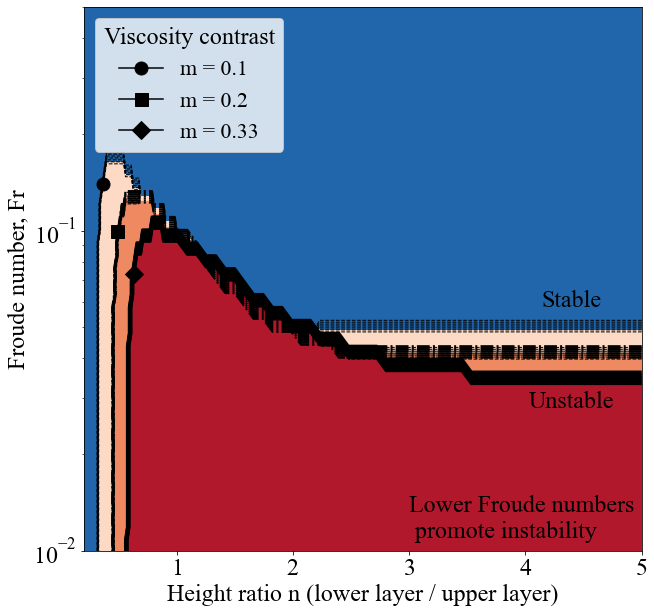

In [4]:
# we are going to mask the heck out of this
red = zs[0] * 3
orange = zs[1] * 2
orange[np.where(red > 0)] = 0
yellow = zs[2]
yellow[np.where((red > 0) | (orange > 0))] = 0

combo_z = red + orange + yellow


fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(d2d2, ff, combo_z, cmap=custom_map)

LW = 3
a1 = ax.contour(d2d2, ff, zs[0], colors="black", linestyles="-", linewidths=LW)
a2 = ax.contour(d2d2, ff, zs[1], colors="black", linestyles="-.", linewidths=LW - 1)
a3 = ax.contour(d2d2, ff, zs[2], colors="black", linestyles="--", linewidths=LW - 2)

MARKER_SIZE = 13

m1_line = mlines.Line2D([], [], color='black', label='m = 0.1', marker="o", markersize=MARKER_SIZE)
m2_line = mlines.Line2D([], [], color='black', label='m = 0.2', marker="s", markersize=MARKER_SIZE)
m3_line = mlines.Line2D([], [], color='black', label='m = 0.33', marker="D", markersize=MARKER_SIZE)

ax.plot(.37, .14, 'o', markersize=MARKER_SIZE, color="black")
ax.plot(.49, .1, 's', markersize=MARKER_SIZE, color="black")
ax.plot(.63, .073, 'D', markersize=MARKER_SIZE, color="black")


ax.text(4.4, .028, "Unstable", c="black", ha="center")
ax.text(4.4, .058, "Stable", c="black", ha="center")
ax.text(3, .011, "Lower Froude numbers\n promote instability", c="black")

ax.set_ylabel("Froude number, Fr")
ax.set_xlabel("Height ratio n (lower layer / upper layer)")

plt.legend(handles=[m1_line, m2_line, m3_line], \
           loc="upper left", fontsize=22, title="Viscosity contrast")

ax.set_yscale('log')
ax.set_ylim(1e-2, .5)

if not os.path.exists("paper_figures"):
    os.mkdir("paper_figures")

fig.savefig("paper_figures/no_slip_phase.png")
fig.savefig("paper_figures/no_slip_phase.svg", format="svg")

In [12]:
np.save("no_slip_d2d2.npy", d2d2)
np.save("no_slip_ff.npy", ff)
np.save("no_slip_z.npy", z)

In [3]:
d2d2 = np.load("no_slip_d2d2.npy")
ff = np.load("no_slip_ff.npy")
z = np.load("no_slip_z.npy")

In [ ]:
# Step 1: cache matrix of vals so you don't have to run again

# Step 2: put dressings on phase diagram plot

# Step 3: Show cansu

# Step 4: Box plot diagrams, see how they compare to Duraiswami and Aubele 

# Step 5: Cleaning out the repo, writing a README.md